## **Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',50)
pd.set_option('display.float_format','{:.3f}'.format)

## **Read the Data & Understand it**

In [3]:
churn_org = pd.read_csv('telecom_churn_data.csv')

In [4]:
# Lets create a copy of this dataframe
# will perform all operations on copied version
churn_df = churn_org.copy()

In [5]:
churn_df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.350,12.200,16.810,82,1,4.000,1,0.000
1,2015,100643,340-5930,Female,39,149,no,no,294.450,7.700,33.370,87,3,3.000,2,0.000
2,2015,100756,372-3750,Female,65,126,no,no,87.300,11.900,9.890,91,1,4.000,5,1.000
3,2015,101595,331-4902,Female,24,131,no,yes,321.300,9.500,36.410,102,4,3.000,3,0.000
4,2015,101653,351-8398,Female,40,191,no,no,243.000,10.900,27.540,83,7,3.000,1,0.000


In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [7]:
churn_df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,1972.000,2000.000,1965.000
mean,2015.000,554887.157,38.691,99.750,270.178,10.199,30.621,100.415,4.482,3.251,1.547,0.133
std,0.000,261033.690,10.206,39.755,80.552,2.786,9.129,19.529,2.488,0.809,1.315,0.340
min,2015.000,100198.000,18.000,1.000,0.000,0.000,0.000,42.000,0.000,0.000,0.000,0.000
25%,2015.000,328634.750,32.000,73.000,218.213,8.400,24.735,87.000,3.000,3.000,1.000,0.000
50%,2015.000,567957.500,37.000,99.000,269.925,10.200,30.590,101.000,4.000,3.000,1.000,0.000
75%,2015.000,773280.250,44.000,127.000,324.675,12.000,36.797,114.000,6.000,4.000,2.000,0.000
max,2015.000,999961.000,82.000,243.000,526.200,20.000,59.640,175.000,19.000,6.000,9.000,1.000


In [8]:
num_cols = churn_df.select_dtypes(include = 'float64').columns

In [9]:
num_cols

Index(['weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'maximum_days_inactive', 'churn'],
      dtype='object')

In [10]:
cat_cols = churn_df.select_dtypes(include = 'object').columns

In [11]:
cat_cols

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [12]:
cols_to_find = churn_df.select_dtypes(include = 'int64').columns

In [13]:
cols_to_find

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_max_night_mins', 'videos_watched', 'customer_support_calls'],
      dtype='object')

- First Lets check if there are any **unnecessary columns**

In [14]:
churn_df['year'].unique()

array([2015], dtype=int64)

In [15]:
churn_df['customer_id'].unique()

array([100198, 100643, 100756, ..., 998474, 998934, 999961], dtype=int64)

In [16]:
churn_df['customer_id'].nunique()

1999

In [17]:
churn_df['phone_no'].unique()

array(['409-8743', '340-5930', '372-3750', ..., '353-2080', '359-7788',
       '414-1496'], dtype=object)

In [18]:
churn_df['phone_no'].nunique()

2000

- 'year' has only 1 value, so we can remove it.
    - Column with only 1 unique value has no variance/Std, so it will not contribute in model's performance
    - We can safely remove this redundant column/feature as it helps in model's computational efficiency without the risk of overfitting
- 'customer_id' & 'phone_no' has every values unique, so we can remove it
    - A unique identifier such as 'customer_id' doesn't help in predicting the target variable, finding patterns or relationship in the data.
    - It is safe to remove this redundant feature as it is unimportant & uneccsarily increasing the complexity.
    - By removing this column, we are increasing model's training efficiency & reducing overfitting.

In [19]:
churn_df.drop(columns=['year','customer_id','phone_no'],inplace=True)

In [20]:
churn_df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.350,12.200,16.810,82,1,4.000,1,0.000
1,Female,39,149,no,no,294.450,7.700,33.370,87,3,3.000,2,0.000
2,Female,65,126,no,no,87.300,11.900,9.890,91,1,4.000,5,1.000
3,Female,24,131,no,yes,321.300,9.500,36.410,102,4,3.000,3,0.000
4,Female,40,191,no,no,243.000,10.900,27.540,83,7,3.000,1,0.000


## **Data Preprocessing & Data Cleaning**

In [21]:
churn_df.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

- Lets check 'gender' column

In [22]:
churn_df['gender'].unique()

array(['Female', nan, 'Male'], dtype=object)

In [23]:
churn_df['gender'].value_counts()

Male      1053
Female     923
Name: gender, dtype: int64

In [24]:
# Lets replace nan values with mode
print(churn_df['gender'].mode().values[0])
churn_df['gender'].fillna(churn_df['gender'].mode().values[0],inplace=True)

Male


In [25]:
churn_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [26]:
churn_df['gender'].value_counts()

Male      1077
Female     923
Name: gender, dtype: int64

- Now, lets do Encoding for 'gender' column

In [27]:
dict1 = {'Female':0,'Male':1}

churn_df['gender'] = churn_df['gender'].map(dict1)

In [28]:
churn_df['gender'].value_counts()

1    1077
0     923
Name: gender, dtype: int64

- Also Encode 'multi_screen' & 'mail_subscribed' as they are cat columns

In [29]:
churn_df['multi_screen'].unique()

array(['no', 'yes'], dtype=object)

In [30]:
churn_df['multi_screen'].value_counts()

no     1802
yes     198
Name: multi_screen, dtype: int64

In [31]:
dict1 = {'no':0,'yes':1}

churn_df['multi_screen'] = churn_df['multi_screen'].map(dict1)

In [32]:
churn_df['multi_screen'].value_counts()

0    1802
1     198
Name: multi_screen, dtype: int64

In [33]:
churn_df['mail_subscribed'].unique()

array(['no', 'yes'], dtype=object)

In [34]:
churn_df['mail_subscribed'].value_counts()

no     1430
yes     570
Name: mail_subscribed, dtype: int64

In [35]:
dict1 = {'no':0,'yes':1}

churn_df['mail_subscribed'] = churn_df['mail_subscribed'].map(dict1)

In [36]:
churn_df['mail_subscribed'].value_counts()

0    1430
1     570
Name: mail_subscribed, dtype: int64

In [37]:
churn_df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62,0,0,148.350,12.200,16.810,82,1,4.000,1,0.000
1,0,39,149,0,0,294.450,7.700,33.370,87,3,3.000,2,0.000
2,0,65,126,0,0,87.300,11.900,9.890,91,1,4.000,5,1.000
3,0,24,131,0,1,321.300,9.500,36.410,102,4,3.000,3,0.000
4,0,40,191,0,0,243.000,10.900,27.540,83,7,3.000,1,0.000


- Lets handle missing values of target column 'churn'

In [38]:
round((churn_df['churn'].isna().sum()/churn_df.shape[0])*100,2)

1.75

In [39]:
churn_df['churn'].dtype

dtype('float64')

In [40]:
churn_df['churn'].unique()

array([ 0.,  1., nan])

In [41]:
churn_df['churn'].value_counts()

0.000    1703
1.000     262
Name: churn, dtype: int64

In [42]:
from sklearn.impute import KNNImputer

In [43]:
knn = KNNImputer()

In [44]:
churn_df['churn'] = np.round(knn.fit_transform(churn_df['churn'].values.reshape(-1,1)),0)

In [45]:
churn_df['churn'].unique()

array([0., 1.])

In [46]:
churn_df['churn'].value_counts()

0.000    1738
1.000     262
Name: churn, dtype: int64

- Lets convert its datatype from float to int

In [47]:
churn_df['churn'] = churn_df['churn'].astype(int)

In [48]:
print(churn_df['churn'].dtype)
churn_df['churn'].unique()

int32


array([0, 1])

- Lets check 'maximum_days_inactive'
- As it is count variable & has natural ordinal relation, so considering it as numerical column

In [49]:
churn_df['maximum_days_inactive'].unique()

array([ 4.,  3., nan,  2.,  5.,  1.,  0.,  6.])

In [50]:
churn_df['maximum_days_inactive'].mean()

3.2505070993914806

In [51]:
churn_df['maximum_days_inactive'].median()

3.0

In [52]:
from sklearn.linear_model import LinearRegression

# Separate rows with and without missing values
known = churn_df[churn_df['maximum_days_inactive'].notnull()]
unknown = churn_df[churn_df['maximum_days_inactive'].isnull()]

# Train regression model
lr = LinearRegression()
lr.fit(known.drop(columns=['maximum_days_inactive']), known['maximum_days_inactive'])

# Predict and fill missing values
churn_df.loc[unknown.index, 'maximum_days_inactive'] = np.round(lr.predict(unknown.drop(columns=['maximum_days_inactive'])))


In [53]:
churn_df['maximum_days_inactive'].unique()

array([4., 3., 2., 5., 1., 0., 6.])

- Lets convert its datatype into int 

In [54]:
churn_df['maximum_days_inactive'] = churn_df['maximum_days_inactive'].astype(int)

In [55]:
churn_df['maximum_days_inactive'].unique()

array([4, 3, 2, 5, 1, 0, 6])

In [56]:
churn_df.isnull().sum()

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

- Lets check infinity values

In [57]:
# for col in churn_df.columns:
#     print(f"{col}: {np.isinf(churn_df[col]).sum()}")

######  OR  ######

print(churn_df.apply(lambda x: np.isinf(x).sum()))

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64


- Lets check duplicate values

In [58]:
churn_df.duplicated().sum()

0

In [59]:
churn_df.index.duplicated().sum()

0

- Now lets observe remaining columns

In [60]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   int64  
 1   age                     2000 non-null   int64  
 2   no_of_days_subscribed   2000 non-null   int64  
 3   multi_screen            2000 non-null   int64  
 4   mail_subscribed         2000 non-null   int64  
 5   weekly_mins_watched     2000 non-null   float64
 6   minimum_daily_mins      2000 non-null   float64
 7   maximum_daily_mins      2000 non-null   float64
 8   weekly_max_night_mins   2000 non-null   int64  
 9   videos_watched          2000 non-null   int64  
 10  maximum_days_inactive   2000 non-null   int32  
 11  customer_support_calls  2000 non-null   int64  
 12  churn                   2000 non-null   int32  
dtypes: float64(3), int32(2), int64(8)
memory usage: 187.6 KB


In [61]:
churn_df[['age', 'no_of_days_subscribed', 'weekly_max_night_mins', 
          'videos_watched', 'customer_support_calls', 'maximum_days_inactive', 'churn']].describe()

,age,no_of_days_subscribed,weekly_max_night_mins,videos_watched,customer_support_calls,maximum_days_inactive,churn
count,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000
mean,38.691,99.750,100.415,4.482,1.547,3.252,0.131
std,10.206,39.755,19.529,2.488,1.315,0.808,0.337
min,18.000,1.000,42.000,0.000,0.000,0.000,0.000
25%,32.000,73.000,87.000,3.000,1.000,3.000,0.000
50%,37.000,99.000,101.000,4.000,1.000,3.000,0.000
75%,44.000,127.000,114.000,6.000,2.000,4.000,0.000
max,82.000,243.000,175.000,19.000,9.000,6.000,1.000


In [62]:
churn_df[['weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins']].describe()

,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins
count,2000.000,2000.000,2000.000
mean,270.178,10.199,30.621
std,80.552,2.786,9.129
min,0.000,0.000,0.000
25%,218.213,8.400,24.735
50%,269.925,10.200,30.590
75%,324.675,12.000,36.797
max,526.200,20.000,59.640


In [63]:
churn_df['multi_screen'].unique()

array([0, 1], dtype=int64)

- Lets check correlation

In [64]:
churn_df.drop(columns=['churn']).corr()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
gender,1.000,-0.009,-0.002,0.011,-0.047,0.003,0.013,0.003,0.034,0.028,0.026,0.008
age,-0.009,1.000,0.039,0.003,-0.012,0.016,-0.001,0.016,0.017,0.013,0.009,0.001
no_of_days_subscribed,-0.002,0.039,1.000,0.033,-0.019,0.001,0.016,0.001,-0.002,0.019,0.018,0.013
multi_screen,0.011,0.003,0.033,1.000,0.021,0.062,0.049,0.062,0.034,0.030,0.031,-0.005
mail_subscribed,-0.047,-0.012,-0.019,0.021,1.000,0.015,0.036,0.015,0.007,0.002,0.042,0.004
weekly_mins_watched,0.003,0.016,0.001,0.062,0.015,1.000,-0.017,1.000,0.038,0.019,-0.015,-0.037
minimum_daily_mins,0.013,-0.001,0.016,0.049,0.036,-0.017,1.000,-0.017,0.008,0.051,0.932,-0.004
maximum_daily_mins,0.003,0.016,0.001,0.062,0.015,1.000,-0.017,1.000,0.038,0.019,-0.015,-0.037
weekly_max_night_mins,0.034,0.017,-0.002,0.034,0.007,0.038,0.008,0.038,1.000,-0.000,0.029,-0.004
videos_watched,0.028,0.013,0.019,0.030,0.002,0.019,0.051,0.019,-0.000,1.000,0.032,-0.001


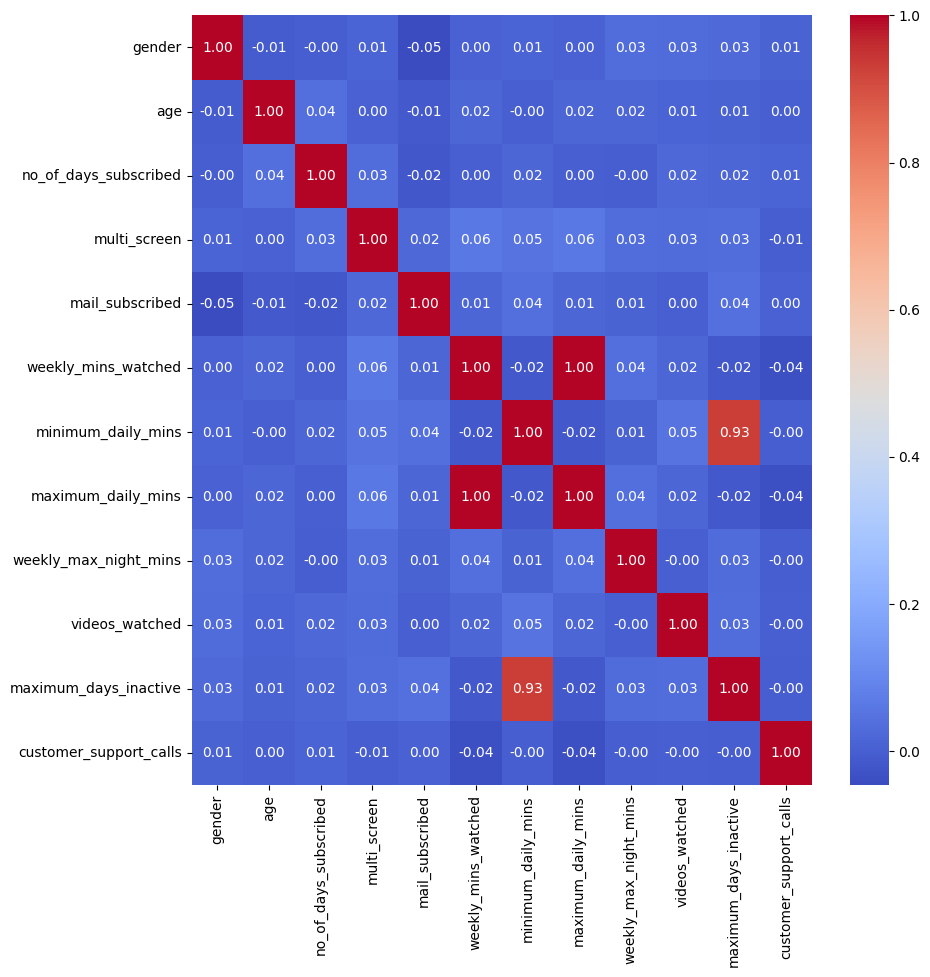

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(churn_df.drop(columns=['churn']).corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
inp_cols = churn_df.drop(columns=['churn']).columns.tolist()
vif_df = pd.DataFrame()
vif_df['Features'] = inp_cols
vif_df['VIF_Value'] = [variance_inflation_factor(churn_df[inp_cols].values,i) for i in range(len(inp_cols))]

In [68]:
vif_df

,Features,VIF_Value
0,gender,2.164
1,age,12.942
2,no_of_days_subscribed,6.828
3,multi_screen,1.121
4,mail_subscribed,1.401
5,weekly_mins_watched,126780332.657
6,minimum_daily_mins,110.703
7,maximum_daily_mins,126784628.068
8,weekly_max_night_mins,19.207
9,videos_watched,4.149


- First lets remove 'maximum_daily_mins' column & again find Vif

In [69]:
churn_df.drop(columns=['maximum_daily_mins'],inplace=True)

In [70]:
inp_cols = churn_df.drop(columns=['churn']).columns.tolist()
vif_df = pd.DataFrame()
vif_df['Features'] = inp_cols
vif_df['VIF_Value'] = [variance_inflation_factor(churn_df[inp_cols].values,i) for i in range(len(inp_cols))]

In [71]:
vif_df

,Features,VIF_Value
0,gender,2.161
1,age,12.910
2,no_of_days_subscribed,6.827
3,multi_screen,1.121
4,mail_subscribed,1.401
5,weekly_mins_watched,10.707
6,minimum_daily_mins,110.684
7,weekly_max_night_mins,19.201
8,videos_watched,4.149
9,maximum_days_inactive,128.973


- Now, lets remove 'maximum_days_inactive' column & again find Vif

In [72]:
churn_df.drop(columns=['maximum_days_inactive'],inplace=True)

In [73]:
inp_cols = churn_df.drop(columns=['churn']).columns.tolist()
vif_df = pd.DataFrame()
vif_df['Features'] = inp_cols
vif_df['VIF_Value'] = [variance_inflation_factor(churn_df[inp_cols].values,i) for i in range(len(inp_cols))]

In [74]:
vif_df

,Features,VIF_Value
0,gender,2.155
1,age,12.797
2,no_of_days_subscribed,6.810
3,multi_screen,1.119
4,mail_subscribed,1.400
5,weekly_mins_watched,10.667
6,minimum_daily_mins,12.070
7,weekly_max_night_mins,18.657
8,videos_watched,4.148
9,customer_support_calls,2.336


- Outlier Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

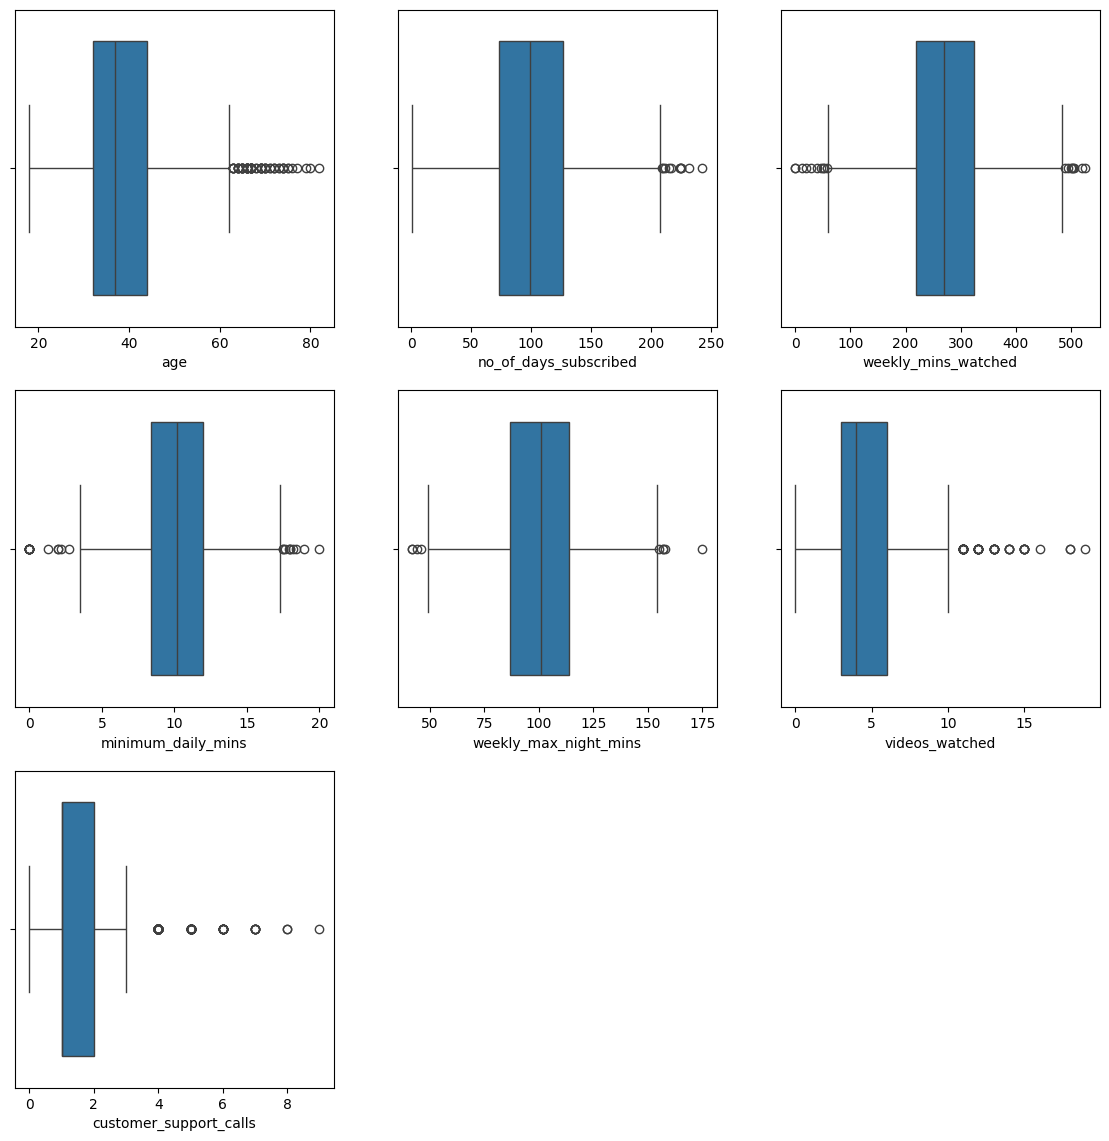

In [75]:
i=0
plt.figure(figsize=(14,14))
for col in ['age', 'no_of_days_subscribed', 'weekly_mins_watched', 'minimum_daily_mins', 'weekly_max_night_mins', 'videos_watched', 'customer_support_calls']:
    plt.subplot(3,3,i+1)
    sns.boxplot(x=churn_df[col],orient='h')
    i=i+1
plt.show

- These outliers seems valid
- We will further analyze these features by checking their distribution & skewness value

In [76]:
churn_df[['age', 'no_of_days_subscribed', 'weekly_mins_watched', 'minimum_daily_mins', 'weekly_max_night_mins', 'videos_watched', 'customer_support_calls']].describe()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls
count,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000,2000.000
mean,38.691,99.750,270.178,10.199,100.415,4.482,1.547
std,10.206,39.755,80.552,2.786,19.529,2.488,1.315
min,18.000,1.000,0.000,0.000,42.000,0.000,0.000
25%,32.000,73.000,218.213,8.400,87.000,3.000,1.000
50%,37.000,99.000,269.925,10.200,101.000,4.000,1.000
75%,44.000,127.000,324.675,12.000,114.000,6.000,2.000
max,82.000,243.000,526.200,20.000,175.000,19.000,9.000


- Lets analyze count/categorical columns with target column (target column is also categorical here)

- 'gender' vs 'churn'

In [77]:
pd.crosstab(churn_df['gender'],churn_df['churn'])

churn,0,1
gender,,
0,797,126
1,941,136


In [78]:
pd.crosstab(churn_df['gender'],churn_df['churn'],normalize=True)*100

churn,0,1
gender,,
0,39.850,6.300
1,47.050,6.800


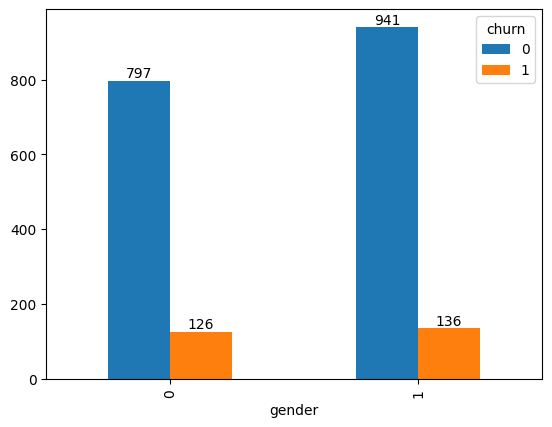

In [79]:
bars = pd.crosstab(churn_df['gender'],churn_df['churn']).plot(kind='bar')
plt.bar_label(bars.containers[0])
plt.bar_label(bars.containers[1])
plt.show()

- 'age' vs 'churn'

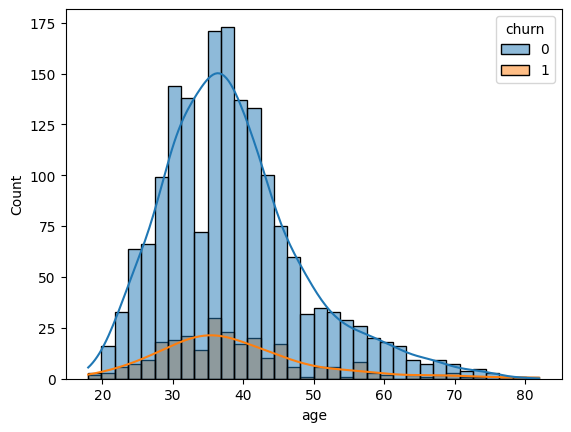

In [80]:
sns.histplot(x=churn_df['age'],hue=churn_df['churn'],kde=True)
plt.show()

- 'customer_support_calls' vs 'churn' vs 'gender'

In [81]:
pd.crosstab(index=[churn_df['gender'], churn_df['churn']], columns=churn_df['customer_support_calls'])

customer_support_calls    0    1    2    3   4   5  6  7  8  9
gender churn                                                  
0      0                167  309  184  101  26   5  3  1  1  0
       1                 24   35   21    9  21  11  3  1  1  0
1      0                207  350  202  136  34   8  1  3  0  0
       1                 22   39   25    8  22  14  4  1  0  1

<Figure size 1000x800 with 0 Axes>

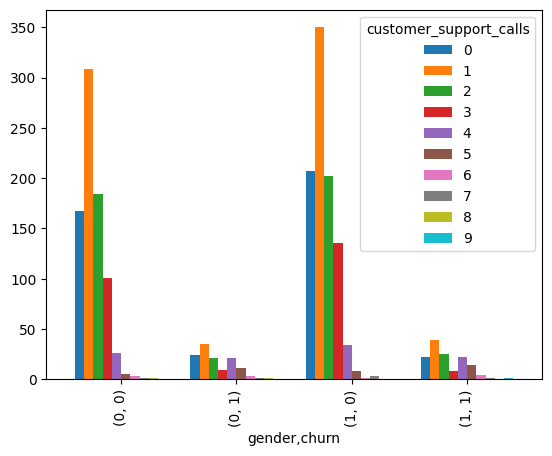

In [82]:
plt.figure(figsize=(10,8))
pd.crosstab(index=[churn_df['gender'], churn_df['churn']], columns=churn_df['customer_support_calls']).plot(kind='bar',stacked=False,width=0.8)
plt.show()

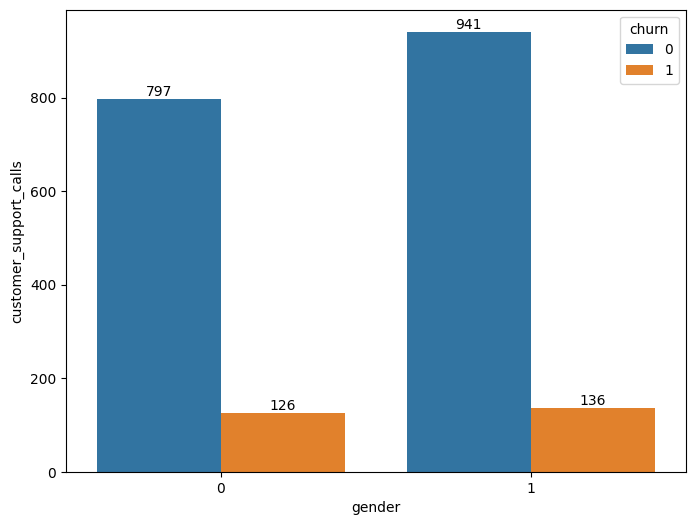

In [83]:
count_data = churn_df.groupby(['gender', 'churn'])['customer_support_calls'].count().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=count_data['gender'], y=count_data['customer_support_calls'], hue=count_data['churn'])
plt.bar_label(bars.containers[0])
plt.bar_label(bars.containers[1])
plt.show()

- 'no_of_days_subscribed' vs 'churn' vs 'gender'

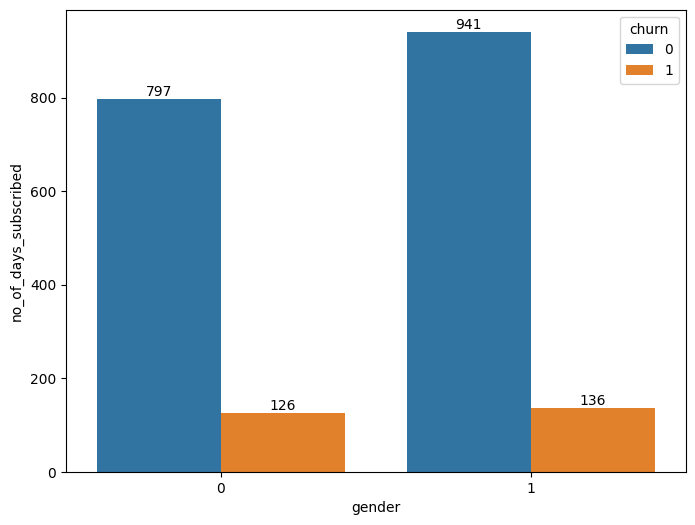

In [84]:
count_data = churn_df.groupby(['gender', 'churn'])['no_of_days_subscribed'].count().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=count_data['gender'], y=count_data['no_of_days_subscribed'], hue=count_data['churn'])
plt.bar_label(bars.containers[0])
plt.bar_label(bars.containers[1])
plt.show()

- 'weekly_max_night_mins' vs 'churn'

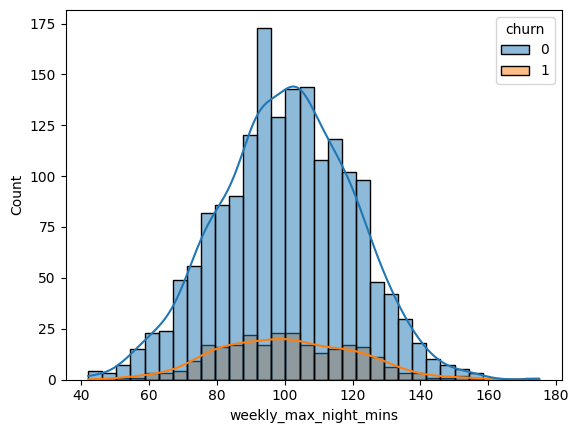

In [85]:
sns.histplot(x=churn_df['weekly_max_night_mins'],hue=churn_df['churn'],kde=True)
plt.show()

- Lets consider numerical (float) columns & plot its histogram

In [86]:
churn_df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,36,62,0,0,148.350,12.200,82,1,1,0
1,0,39,149,0,0,294.450,7.700,87,3,2,0
2,0,65,126,0,0,87.300,11.900,91,1,5,1
3,0,24,131,0,1,321.300,9.500,102,4,3,0
4,0,40,191,0,0,243.000,10.900,83,7,1,0


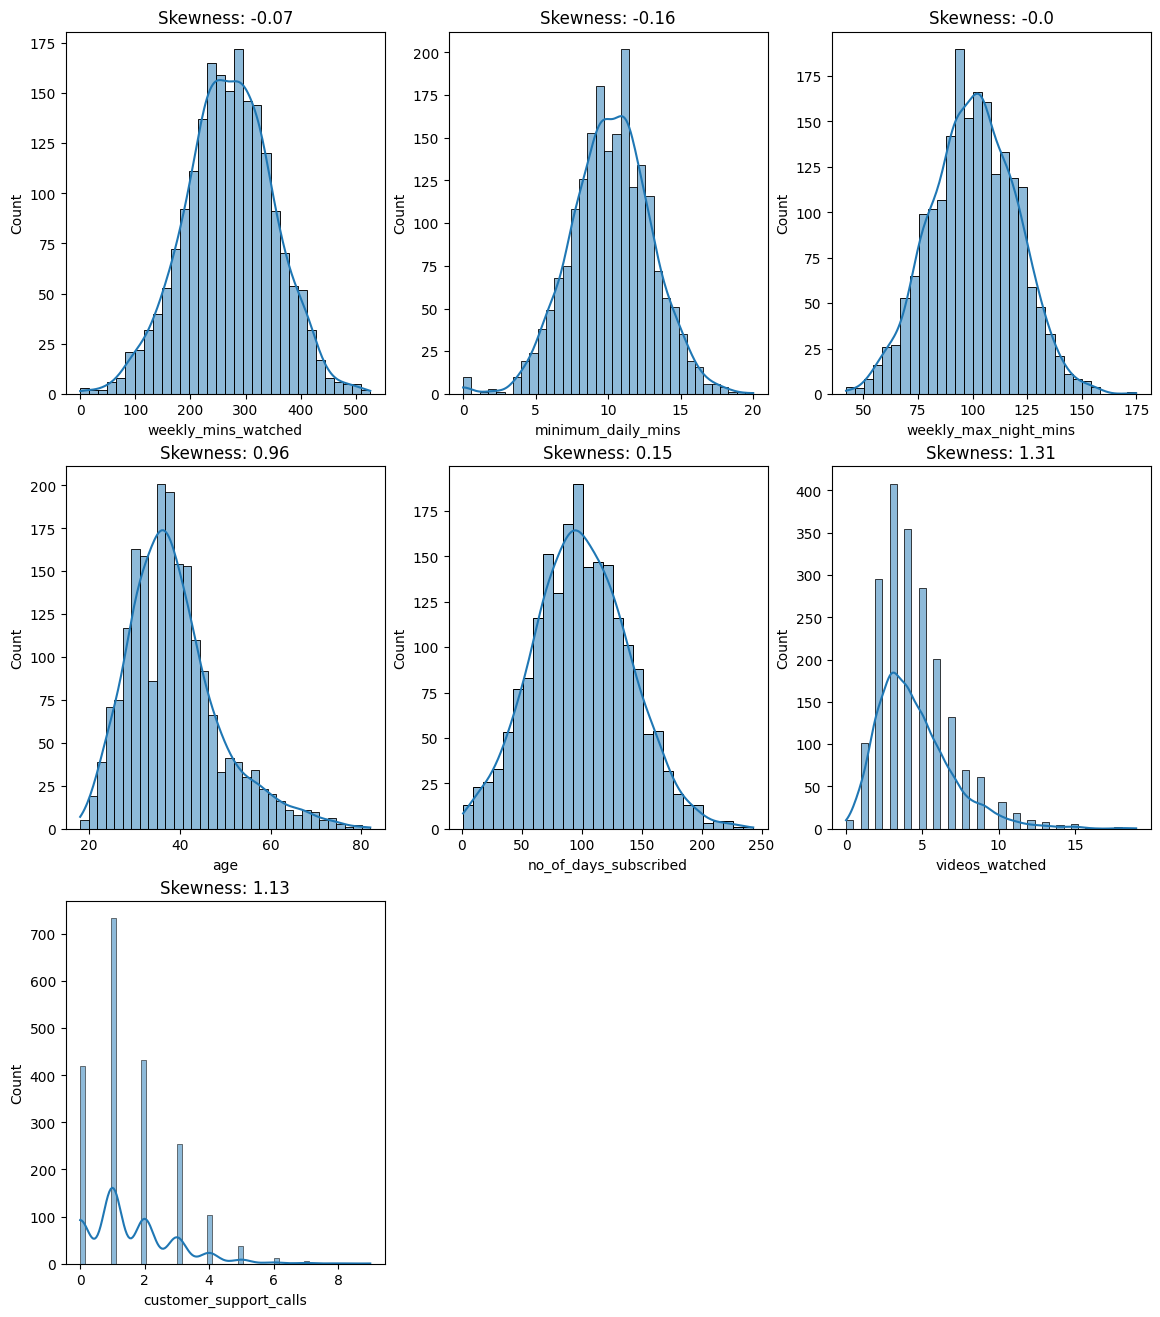

In [87]:
i=0
plt.figure(figsize=(14,16))
for col in ['weekly_mins_watched','minimum_daily_mins','weekly_max_night_mins', 'age', 'no_of_days_subscribed', 'videos_watched', 'customer_support_calls']:
    plt.subplot(3,3,i+1)
    sns.histplot(churn_df[col],kde=True)
    plt.title(f'Skewness: {np.round(churn_df[col].skew(),2)}')
    i = i+1
plt.show()

**Models that are insensitive to magnitude differences means they do not require feature scaling.**

- All tree based models (they split data based on feature threshold):
    - Random Forest
    - Decision Trees
    - Gradient Boosting Machines (e.g., XGBoost, LightGBM)
    - Ensemble Techniques (Bagging or Bossting which utilizes Tree based learning)
- Naive Bayes (it uses probability)

**Models that are sensitive to magnitude differences means they require feature scaling.**

- Which rely on gradients
    - Linear Regression
    - Logistic Regression
    - Neural Networks
- Which rely on distance
    - SVM
    - KNN

**Models that are insensitive to skewness (or feature distribution) means they do not require Data Transformation.**

- All tree based models (splits are based on feature threshold not statistical assumptions):
    - Random Forest
    - Decision Trees
    - Gradient Boosting Machines (e.g., XGBoost, LightGBM)
    - Ensemble Techniques (Bagging or Bossting which utilizes Tree based learning)
- Naive Bayes (it uses probability)

**Models that are sensitive to skewness (assume that data should follow nomral distribution) means they require Data Transformation.**

- Linear Models
    - Linear Regression
    - Logistic Regression

- Models using distance metrics
    - SVM
    - KNN
    - K-means

- Neural Networks
- PCA

**We will save 2 types of cleaned data**

- First Lets Save this cleaned data (without transformation & Scaling)

In [88]:
churn_df_cleaned_1 = churn_df.copy()

In [89]:
churn_df_cleaned_1.to_csv('churn_cleaned1.csv',header=True,index=False)

- Lets Transform 'age', 'videos_watched', 'customer_support_calls' columns as its skewness value is comparatively high

In [90]:
from sklearn.preprocessing import PowerTransformer
import joblib

pt = PowerTransformer(method='box-cox')
churn_df['age'] = pt.fit_transform(churn_df['age'].values.reshape(-1,1))

joblib.dump(pt, 'power_transformer_age.joblib')

['power_transformer_age.joblib']

In [91]:
from sklearn.preprocessing import PowerTransformer
import joblib

pt1 = PowerTransformer()
churn_df['videos_watched'] = pt1.fit_transform(churn_df['videos_watched'].values.reshape(-1,1))
churn_df['customer_support_calls'] = pt1.fit_transform(churn_df['customer_support_calls'].values.reshape(-1,1))

joblib.dump(pt1, 'power_transformer.joblib')

['power_transformer.joblib']

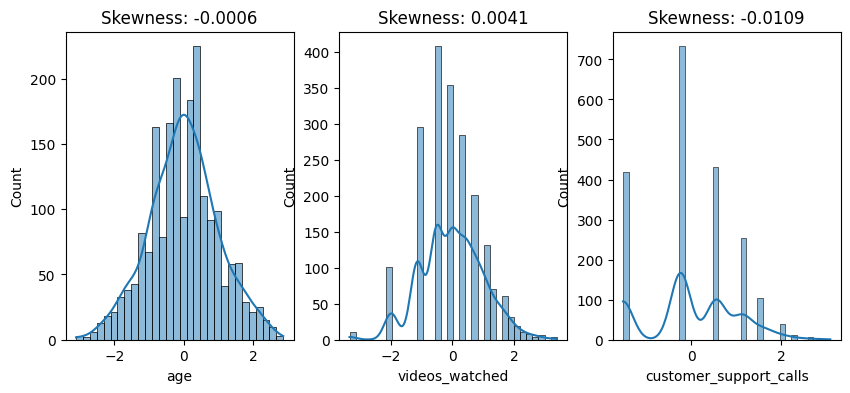

In [92]:
i=0
plt.figure(figsize=(10,4))
for col in ['age', 'videos_watched', 'customer_support_calls']:
    plt.subplot(1,3,i+1)
    sns.histplot(churn_df[col],kde=True)
    plt.title(f'Skewness: {np.round(churn_df[col].skew(),4)}')
    i = i+1
plt.show()

In [93]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

for col in ['weekly_mins_watched','minimum_daily_mins','weekly_max_night_mins', 'age', 'no_of_days_subscribed', 'videos_watched', 'customer_support_calls']:
    churn_df[col] = ss.fit_transform(churn_df[col].values.reshape(-1,1))

joblib.dump(ss,'standard_scaler.joblib')

['standard_scaler.joblib']

In [94]:
churn_df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,-0.128,-0.950,0,0,-1.513,0.719,-0.943,-1.977,-0.239,0
1,0,0.188,1.239,0,0,0.301,-0.897,-0.687,-0.513,0.551,0
2,0,2.079,0.660,0,0,-2.271,0.611,-0.482,-1.977,1.975,1
3,0,-1.817,0.786,0,1,0.635,-0.251,0.081,-0.016,1.130,0
4,0,0.286,2.296,0,0,-0.337,0.252,-0.892,1.075,-0.239,0


In [95]:
cleaned_data2 = churn_df.copy()

- Now lets save this cleaned data (with transformation & Scaling)

In [96]:
cleaned_data2.to_csv('churn_cleaned2.csv',header=True,index=False)

- PCA is good for Logistic Regression, Linear Regression or SVM, especially when the input features are highly correlated.
- It reduces multicollinearity, dimensionality, computational cost and simplifies the model by transforming correlated features into uncorrelated principal components.
- It prevents overfitting
- Good for KNN, K-means clustering models as well (making distance computations more efficient)
- Also, PCA requires data to be scaled

- Not good for Tree-based models (Decision Trees, Random Forest, XGboost, LightGB because these models handle features importance & they are not affected by multicollineaity

In [97]:
from sklearn.decomposition import PCA

# Exclude non-numeric columns (e.g., 'gender') for PCA
numeric_data = churn_df.select_dtypes(include=['float64', 'int64'])

# Step 2: Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(numeric_data)


In [98]:
numeric_data.columns

Index(['gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'customer_support_calls'],
      dtype='object')

In [99]:
data_pca

array([[-1.57797252, -1.25047432, -0.26179665, ...,  0.50141109,
         1.21968372, -0.40344653],
       [-0.48838712,  0.07413124,  1.26677862, ..., -0.06846902,
         0.18870426, -0.43542005],
       [-0.68864764, -1.50149722,  3.14444082, ..., -0.07176427,
         1.38569704, -0.39665458],
       ...,
       [ 3.27371655, -1.04428347, -0.82618799, ..., -0.02874663,
        -1.62616867,  0.45422127],
       [ 0.28145449, -1.17311251,  0.74496915, ..., -0.53565554,
        -0.6051119 ,  0.49669721],
       [ 0.29687922,  0.11207349, -0.89206038, ..., -0.9491859 ,
        -0.0918132 ,  0.51141514]])

In [100]:
data_pca.shape

(2000, 8)

In [101]:
data_pca.shape[1]

8

In [102]:
# Step 3: Extract PCA results into a DataFrame
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

# # Results summary
pca_summary = {
    "Original Features": numeric_data.shape[1],
    "Principal Components Retained": data_pca.shape[1],
    "Explained Variance Ratio": pca.explained_variance_ratio_.tolist(),
}

data_pca_df.head(), pca_summary


(     PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8
 0 -1.578 -1.250 -0.262 -0.506  1.589  0.501  1.220 -0.403
 1 -0.488  0.074  1.267 -0.775 -1.035 -0.068  0.189 -0.435
 2 -0.689 -1.501  3.144 -0.051  1.966 -0.072  1.386 -0.397
 3 -0.380 -0.481  0.056  0.901 -2.018  0.561  0.212 -0.708
 4  1.522 -0.802  1.012 -1.505 -0.964  0.449 -0.409 -0.465,
 {'Original Features': 10,
  'Principal Components Retained': 8,
  'Explained Variance Ratio': [0.14536620622961824,
   0.14010268672286488,
   0.1349022270791304,
   0.13290724116873165,
   0.1285230174289386,
   0.12642906142276833,
   0.12027010315921333,
   0.03316398927855797]})